# 薛定谔方程
---

Time-dependent Schrödinger equation (nonrelativistic version) 
$$i \hbar \frac{d}{d t}|\Psi(t)\rangle=\hat{H}|\Psi(t)\rangle$$

Holding the Hamiltonian $\hat{H}$ constant, the Schrödinger equation has the solution,
$$|\Psi(t)\rangle=e^{-i \hat{H} t / \hbar}|\Psi(0)\rangle$$
The operater $\hat{U}=e^{-i \hat{H} t / \hbar}$ is known as the time-evolution operator.

Wave functions can form standing waves, called stationary states, described by Time-independent Schrödinger equation,
$$\hat{H}|\Psi\rangle=E\Psi$$
where Hamiltonian operator $\hat{H}=-\frac{\hbar^{2}}{2 m} \nabla^{2}+V(\mathbf{r})$ in the position representation.

## Real-Space Grid
---
The simplest way to represent a real function $f(x)$, with $a ≤ x ≤ b$, is to sample it on a real-space grid of points $\left\{x_i\right\}$ from a to b with some uniform spacing h. The function is then represented by the vector of values $\left\{f (x_i)\right\}$

Second order linear differention in discrete space,
$$\frac{d^{2} f}{d x^{2}}=\lim _{h \rightarrow 0} \frac{f(x-h)-2 f(x)+f(x+h)}{h^{2}}$$  
[Laplace operator](https://en.wikipedia.org/wiki/Discrete_Laplace_operator) applied on discrete coordinates in [a, b]
$$
\frac{d^{2} f}{d x^{2}}=\begin{bmatrix}\begin{array}{ccccccc}-2 & 1 & 0 & \ldots & 0 & 0 \\ 1 & -2 & 1 & \ldots & 0 & 0 \\ 0 & 1 & -2 & \ldots & 0 & 0 \\ \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & \ldots & -2 & 1 \\ 0 & 0 & 0 & \ldots & 1 & -2\end{array}\end{bmatrix}\begin{bmatrix}\begin{array}{c}f(a) \\ f(a+h) \\ f(a+2 h) \\ \ldots \\ f(a+(n-2) h) \\ f(b)\end{array}\end{bmatrix} / h^{2}=\operatorname{Lap}|f\rangle
$$  

In [1]:
import scipy.sparse as sp

n_grid = 4
Lap_1D = sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2*sp.eye(n_grid)
Lap_2D = sp.kron(sp.eye(n_grid), Lap_1D) + sp.eye(n_grid**2, k=-n_grid) + sp.eye(n_grid**2, k=n_grid) - 2*sp.eye(n_grid**2)
Lap_3D = sp.kron(sp.eye(n_grid), Lap_2D) + sp.eye(n_grid**3, k=-n_grid**2) + sp.eye(n_grid**3, k=n_grid**2) - 2*sp.eye(n_grid**3)

## 束缚态和能级分立
---

1. 对于取值被“限制在一定空间范围内的”波函数、或者更准确说是在无穷远处收敛的波函数，它的能级是分立的，这样的状态叫做束缚态。
2. 对于无穷远处不收敛的波函数（例如自由粒子），能级则是连续的，这样的态叫做散射态。
3. 满足所谓周期性边界条件的波函数（例如氢原子的电子），它们在无穷远处不收敛，但能级也可能是分立的。

## 一维单粒子薛定谔方程
---

We will establish a matrix representation of the Hamiltonian of one partical $x \in [-5, 5]$ starting with the kinetic operator $-\frac{\hbar^{2}}{2 m}$ and a external potential $v_{ext}$.

In [2]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

class Schrodinger1D:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar = 1,
                 xmin=-5, xmax=5, ninterval=256):
        self.x = np.linspace(xmin, xmax, ninterval)
        self.Potential = sp.diags(potential_func(self.x), 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, n_grid):
        return (sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2*sp.eye(n_grid)) / (dx**2)
    def eig_solve(self):
        time_start = time.time()
        eigValue, eigVector = sp.linalg.eigsh(self.Hamiltonian, k=16, which='SA')
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
    def plot_wavefunction(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            ax.plot(self.x, self.eigVector[:, n], label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.abs(self.eigVector[:, n]) ** 2
            ax.plot(self.x, density, label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\rho(x)=\psi^*(x)\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()

### 无限深方势井
---

Times Used 0.03 S
Lowest Energies [0.04896413 0.1958492  0.44063325 0.78327973 1.22373741]


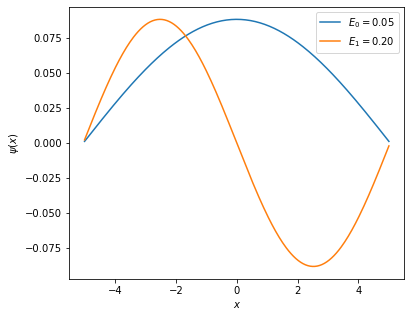

In [3]:
def infinite_square_potential(x):
    return np.zeros_like(x)

schro_infinite_square = Schrodinger1D(infinite_square_potential)
schro_infinite_square.eig_solve()
print("Lowest Energies", schro_infinite_square.eigEnergy[0:5])

schro_infinite_square.plot_wavefunction(0, 1)

数值计算结果和解析解相符。

$$\phi_{n}=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}$$
$$E_{n}=\frac{n^2h^2}{8mL^2}$$

粒子在简谐势阱中的分布概率密度

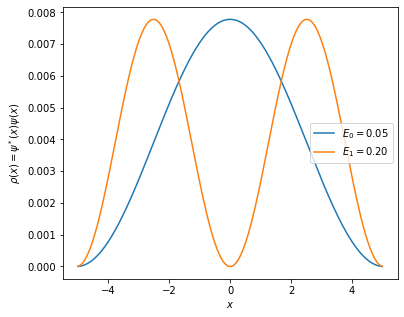

In [4]:
schro_infinite_square.plot_density(0, 1)

### 简谐势井
---

Times Used 0.02 S
Lowest Energies [0.70978362 2.12915855 3.54814877 4.96675414 6.38497449]


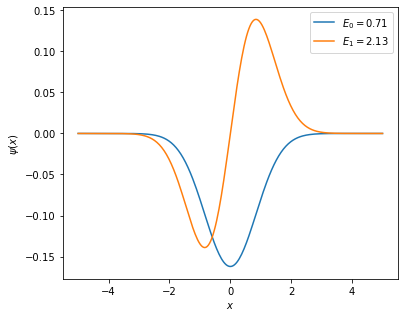

In [5]:
def harmonic_potential(x, k=2):
    return 0.5 * k * x**2

schro_harmonic = Schrodinger1D(harmonic_potential)
schro_harmonic.eig_solve()
print("Lowest Energies", schro_harmonic.eigEnergy[0:5])

schro_harmonic.plot_wavefunction(0, 1)

粒子在简谐势阱中的分布概率密度

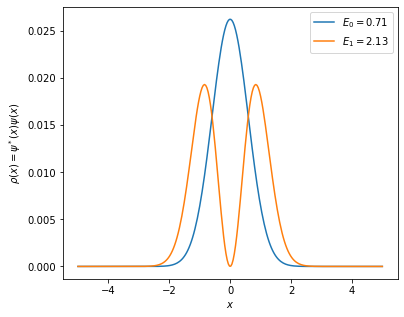

In [6]:
schro_harmonic.plot_density(0, 1)

### 有限深方势井
---

Times Used 0.02 S
Lowest Energies [-19.04611539 -16.21412301 -11.61183468  -5.53233771   0.15263139]


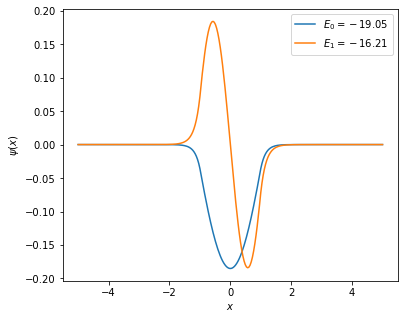

In [7]:
def square_well_potential(x, h=-20):
    u = np.zeros_like(x)
    u[abs(x) < 1] = h
    return u

schro_square_well = Schrodinger1D(square_well_potential)
schro_square_well.eig_solve()
print("Lowest Energies", schro_square_well.eigEnergy[0:5])

schro_square_well.plot_wavefunction(0, 1)

粒子在有限深方势阱中的分布概率密度

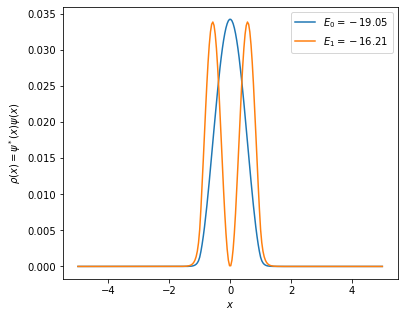

In [8]:
schro_square_well.plot_density(0, 1)

### 有限深双方势井
---


Times Used 0.03 S
Lowest Energies [-12.53181485 -12.47768415   0.1890732    0.25817336   0.67775272]


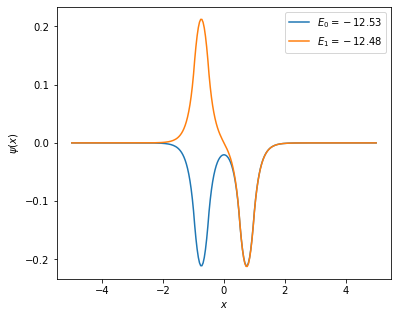

In [9]:
def double_well_potential(x, h=-20):
    u = np.zeros_like(x)
    u[(abs(x) > 0.5) & (abs(x) < 1)] = h
    return u

schro_double_well = Schrodinger1D(double_well_potential)
schro_double_well.eig_solve()
print("Lowest Energies", schro_double_well.eigEnergy[0:5])

schro_double_well.plot_wavefunction(0, 1)

粒子在有限深双势阱中的分布概率密度

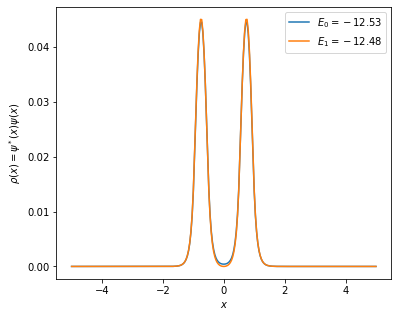

In [10]:
schro_double_well.plot_density(0, 1)

可以看到，有限深双势井的基态是简并的，且粒子分布概率密度相同。

### 量子叠加态和含时薛定谔方程
---

Consider initial state to be a linear combination of groud state and 1st excitation state,
$$|\Psi(t=0)\rangle=(|\Psi_{E_{0}}\rangle + |\Psi_{E_{1}}\rangle)/\sqrt{2}$$
which is not stationary and its density distribution is time-dependent.
$$|\psi(t)\rangle=\frac{1}{\sqrt{2}}\left(\left|\psi_{E_{0}}\right\rangle \exp \left(\frac{-i E_{0} t}{\hbar}\right)+\left|\psi_{E_{1}}\right\rangle \exp \left(\frac{-i E_{1} t}{\hbar}\right)\right)$$
$$\rho(x, t)=\langle\psi(t)|\psi(t)\rangle=\frac{1}{2}\left[\left|\psi_{E_{0}}(x)\right|^{2}+\left|\psi_{E_{1}}(x)\right|^{2}+2\left|\psi_{E_{0}}(x)\right|\left|\psi_{E_{1}}(x)\right| \cos \left(\frac{(E_{0}-E_{1}) t}{\hbar}\right)\right]$$

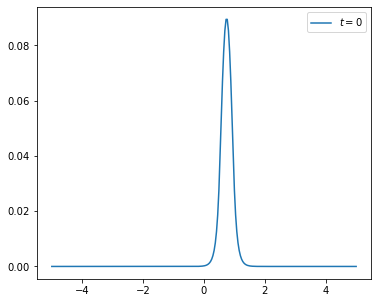

In [11]:
def psit(t, hbar = 1):
    psi0 = schro_double_well.eigVector[:, 0]
    psi1 = schro_double_well.eigVector[:, 1]
    E0 = schro_double_well.eigEnergy[0]
    E1 = schro_double_well.eigEnergy[1]
    return 1/np.sqrt(2) * (psi0 * np.exp(-1j * E0 * t/hbar)
                        +  psi1 * np.exp(-1j * E1 * t/hbar))

density = np.abs(psit(0)) ** 2

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(schro_double_well.x, density, label = r'$t = 0$')
ax.legend()

The partical is oscillating between the two wells with a period of $\frac{2\pi\hbar}{E_{0}-E_{1}}$

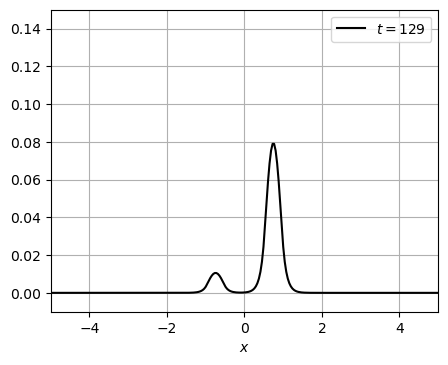

In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class UpdateDist:
    def __init__(self, ax, x):
        self.success = 0
        self.line, = ax.plot([], [], 'k-')
        self.x = x
        self.ax = ax
        self.ax.set_xlim(-5, 5)
        self.ax.set_ylim(-0.01, 0.15)
        self.ax.grid(True)
    def __call__(self, i):
        time = i * 1
        psi = psit(t = time)
        density = np.abs(psi) ** 2
        self.line.set_data(self.x, density)
        self.line.set_label(r'$t=%s$'%(time))
        self.ax.legend()
        return self.line,

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=100)
ax.set_xlabel(r'$x$')
ud = UpdateDist(ax, x=schro_double_well.x)
ani = FuncAnimation(fig, ud, frames=130, interval=100, blit=True)
ani.save('DoubleWell.gif', writer='imagemagick', fps=20)

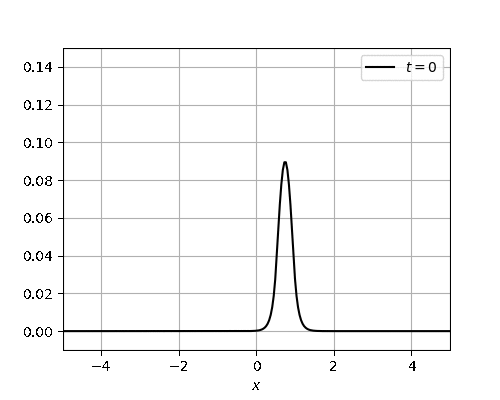

In [13]:
from IPython.display import Image
Image(filename ='DoubleWell.gif', width=500)

可以发现：

1. 对于一维非奇性势能运动，粒子运动不简并，第n个激发态有n个零点。
2. 对于双无限深势井，第n和n+1个激发态能量简并。对应的物理图像是粒子无法穿越无限高势垒。

### 基矢变换
---
选择一组基函数（基矢），将原函数表示为基函数的线性组合。原问题转变为求解基函数的组合系数。

$$\phi_{n}=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}$$
$$\phi_{old} = A \phi_{new}$$
$$H_{new} = A^T H_{old} A$$

In [14]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

class Schrodinger1D_basis_set:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar = 1,
                 xmin=-5, xmax=5, ninterval=256):
        self.xmin = xmin
        self.xmax = xmax
        self.ninterval = ninterval
        self.x = np.linspace(xmin, xmax, ninterval)
        self.Potential = sp.diags(potential_func(self.x), 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, n_grid):
        return (sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2*sp.eye(n_grid)) / (dx**2)       
    def basis_set(self, n):
        phi = np.zeros(self.ninterval)
        for i in range(self.ninterval):
            phi[i] = np.sqrt(2/self.ninterval) * np.sin((n+1)*np.pi*i/self.ninterval)
        return phi
    def eig_solve(self, nmax):
        ''' X_old = A X_new '''
        time_start = time.time()
        self.transition_matrix = np.zeros([self.ninterval, nmax])
        for n in range(nmax):
            self.transition_matrix[:,n] = self.basis_set(n)
        Hamiltonian_new = self.transition_matrix.T@self.Hamiltonian@self.transition_matrix
        '''Hamiltonian in the new basis sets is not sparse matrix'''
        eigValue, eigVector = np.linalg.eigh(Hamiltonian_new)  
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
    def plot_wavefunction(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            ax.plot(self.x, self.transition_matrix@self.eigVector[:, n], label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.abs(self.transition_matrix@self.eigVector[:, n]) ** 2
            ax.plot(self.x, density, label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        ax.set_ylabel(r'$\rho(x)=\psi^*(x)\psi(x)$')
        ax.set_xlabel(r'$x$')
        ax.legend()

我们使用的基函数是无限深方势阱的能量本征态。对于无限深方势阱，基矢变换不会引入误差。

Times Used 0.01 S
Energy [0.0493474  0.19738218 0.44408204 0.78940982 1.23331353]


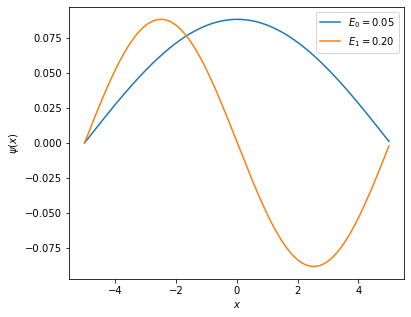

In [15]:
def infinite_square_potential(x):
    return np.zeros_like(x)

schro_bs_infinite_square = Schrodinger1D_basis_set(infinite_square_potential)
schro_bs_infinite_square.eig_solve(8)  # 基矢数目为8
print("Energy", schro_bs_infinite_square.eigEnergy[:5])

schro_bs_infinite_square.plot_wavefunction(0, 1)

对于其他类型的势井，例如简谐势井，如果基矢组规模较小，拟合效果就会比较差。计算得到的本征值也会产生较大误差。

Times Used 0.00 S
Energy [0.72581599 2.18467693 4.12768269 5.77818769 9.46444655]


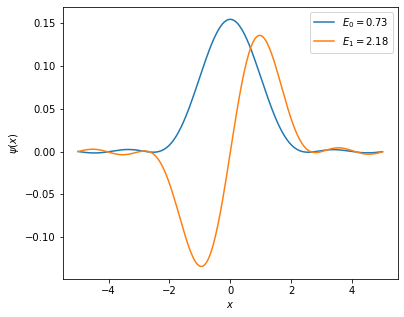

In [16]:
def harmonic_potential(x, k=2):
    return 0.5 * k * x**2

schro_bs_harmonic = Schrodinger1D_basis_set(harmonic_potential)
schro_bs_harmonic.eig_solve(8)  # 基矢数目为8
print("Energy", schro_bs_harmonic.eigEnergy[0:5])

schro_bs_harmonic.plot_wavefunction(0, 1)

通过增加基矢数量，可以消除上述误差。

Times Used 0.01 S
Energy [0.70978364 2.12915865 3.54816331 4.96677849 6.38616745]


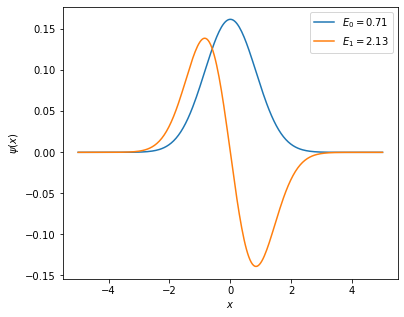

In [17]:
schro_bs_harmonic.eig_solve(16)  # 基矢数目为16
print("Energy", schro_bs_harmonic.eigEnergy[0:5])

schro_bs_harmonic.plot_wavefunction(0, 1)

## 一维双粒子薛定谔方程
---

考虑一个无相互作用双粒子的波函数 $\phi(x_1, x_2)$，将其离散化到$N^2$个坐标格点$\left\{x_{1i}, x_{2j}\right\}$，对应的Hamiltonian矩阵的尺寸为$N^2 \times N^2$。

In [18]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

class Schrodinger2D:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar = 1,
                 xmin = -5, xmax = 5, ninterval=128):
        self.ninterval = ninterval
        self.x1 = np.linspace(xmin, xmax, ninterval)
        self.x2 = np.linspace(xmin, xmax, ninterval)
        potential = np.zeros(ninterval**2)
        for i in range(ninterval):
            for j in range(ninterval):
                potential[i*ninterval+j] = potential_func(self.x1[i], self.x2[j])
        self.Potential = sp.diags(potential)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, n_grid):
        lap_1D = sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2 * sp.eye(n_grid)
        lap_2D = sp.kron(sp.eye(n_grid), lap_1D) + sp.eye(n_grid**2, k=-n_grid) + sp.eye(n_grid**2, k=n_grid) - 2*sp.eye(n_grid**2)
        return lap_2D / (dx**2)
    def eig_solve(self):
        time_start = time.time()
        eigValue, eigVector = sp.linalg.eigsh(self.Hamiltonian, k=16, which='SA')
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
    def plot_wavefunction(self, n):
        wave_func = np.reshape(self.eigVector[:, n], (self.ninterval, self.ninterval))
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        p = ax.imshow(wave_func.real, cmap='hot')
        cb = fig.colorbar(p, shrink=0.8)
        cb.set_label(r"$\phi(x_1, x_2).real$", fontsize=18)
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')
        ax.set_title(r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n]), loc='left', fontsize=16)
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.zeros(self.ninterval)
            for i in range(self.ninterval):
                for j in range(self.ninterval):
                    density[i] += np.abs(self.eigVector[:, n][i*self.ninterval+j]) ** 2
                    density[j] += np.abs(self.eigVector[:, n][i*self.ninterval+j]) ** 2
            ax.plot(density, label=r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n]))
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\rho=\psi^*\psi$')
        ax.legend()

### 无限深方势井
---

In [19]:
def infinite_square_potential(x1, x2):
    return 0.0

schro_infinite_square = Schrodinger2D(infinite_square_potential)
schro_infinite_square.eig_solve()

print("Lowest Energies", schro_infinite_square.eigEnergy[:6])

Times Used 16.49 S
Lowest Energies [0.097167   0.24288869 0.24288869 0.38861038 0.48566215 0.48566215]


我们可以将双粒子波函数的解写为：
$$\Phi=C_{1}\phi_{n}(x_{1})\phi_{m}(x_{2}) + C_{2}\phi_{m}(x_{1})\phi_{n}(x_{2})$$
其中$\phi$为单粒子波函数。

对应的能量为：
$$E=(n^2+m^2)\frac{\pi\hbar^2}{2ma^2}$$

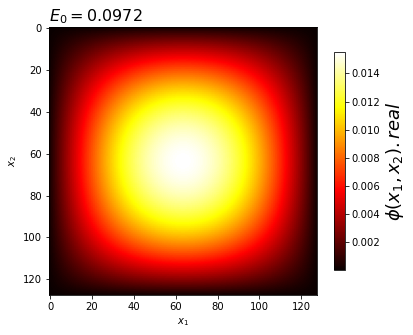

In [20]:
schro_infinite_square.plot_wavefunction(0)

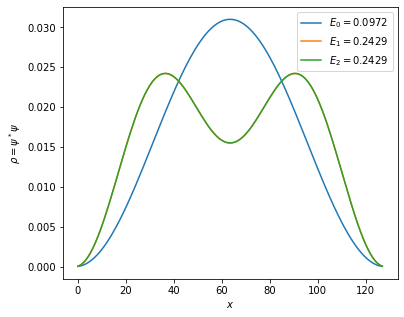

In [21]:
schro_infinite_square.plot_density(0, 1, 2)

根据量子力学的全同粒子假设，多粒子波函数的坐标交换之后，新状态应当与原状态是不可区分的。

$$\hat{P_{ij}} \Phi = C \Phi$$

其中$C=1$（交换对称）或者$C=-1$（交换反对称）。

我们下面将检查数值求解得到的波函数的对称性：

In [22]:
def check_symmetry(wave_func):
    wave_func_trans = np.transpose(wave_func)
    vector_exchange = wave_func_trans.flatten()
    wave_sum = (wave_func + wave_func_trans)
    wave_diff = (wave_func - wave_func_trans)
    if np.max(abs(wave_sum)) < 1e-02:
        print("Exchange Antisymmetry %.2f" %(np.max(abs(wave_sum))))
    elif np.max(abs(wave_diff)) < 1e-02:
        print("Exchange Symmetry %.2f" %(np.max(abs(wave_diff))))
    else:
        print("No Exchange Symmetry %.2f %.2f" %(np.max(abs(wave_sum)), np.max(abs(wave_diff))))
for n in range(8):
    wave_func = np.reshape(schro_infinite_square.eigVector[:, n], (schro_infinite_square.ninterval, schro_infinite_square.ninterval))
    print("Energy %.4f Orbital %.2d  " %(np.real(schro_infinite_square.eigEnergy[n]), n+1), end="")
    check_symmetry(wave_func)

Energy 0.0972 Orbital 01  Exchange Symmetry 0.00
Energy 0.2429 Orbital 02  Exchange Symmetry 0.00
Energy 0.2429 Orbital 03  Exchange Antisymmetry 0.00
Energy 0.3886 Orbital 04  Exchange Symmetry 0.00
Energy 0.4857 Orbital 05  Exchange Antisymmetry 0.01
Energy 0.4857 Orbital 06  Exchange Symmetry 0.01
Energy 0.6314 Orbital 07  No Exchange Symmetry 0.04 0.02
Energy 0.6314 Orbital 08  No Exchange Symmetry 0.02 0.04


波色子交换对称，
$$\Phi_{n,m}=\frac{1}{\sqrt{2}}(\phi_{n}(x_{1})\phi_{m}(x_{2})+\phi_{n}(x_{2})\phi_{m}(x_{1}))$$

费米子交换反对称，
$$\Phi_{n,m}=\frac{1}{\sqrt{2}}(\phi_{n}(x_{1})\phi_{m}(x_{2})-\phi_{n}(x_{2})\phi_{m}(x_{1})), n \neq m$$

### 库伦相互作用

考虑两个带电粒子，例如电子（我们的方程中没有考虑自旋）。

In [23]:
def coulomb_potential(x1, x2, k=1):
    return k / (abs(x1-x2) + 1e-6)

schro_coulomb = Schrodinger2D(coulomb_potential)
schro_coulomb.eig_solve()

print("Energy", schro_coulomb.eigEnergy[:6])

Times Used 26.75 S
Energy [0.5171486  0.51714871 0.83154552 0.83154585 0.95598692 0.95598752]


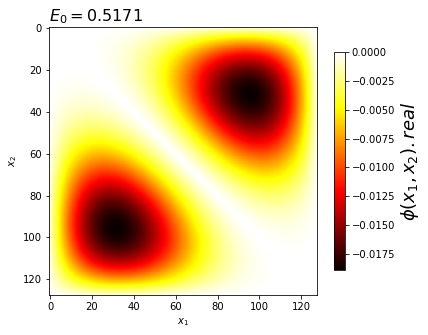

In [24]:
schro_coulomb.plot_wavefunction(0)

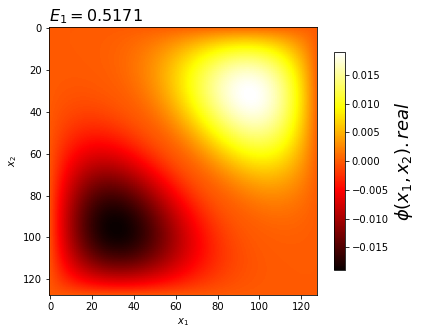

In [25]:
schro_coulomb.plot_wavefunction(1)

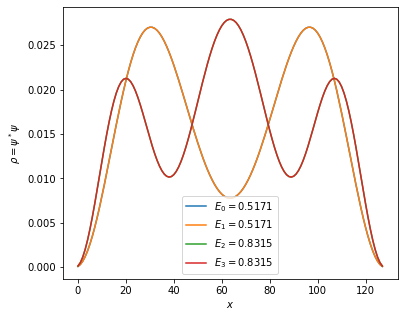

In [26]:
schro_coulomb.plot_density(0, 1, 2, 3)

我们再来检查轨道的对称性：

In [27]:
for n in range(8):
    wave_func = np.reshape(schro_coulomb.eigVector[:, n], (schro_coulomb.ninterval, schro_coulomb.ninterval))
    print("Energy %.4f Orbital %.2d  " %(np.real(schro_coulomb.eigEnergy[n]), n+1), end="")
    check_symmetry(wave_func)

Energy 0.5171 Orbital 01  Exchange Symmetry 0.00
Energy 0.5171 Orbital 02  Exchange Antisymmetry 0.00
Energy 0.8315 Orbital 03  Exchange Symmetry 0.00
Energy 0.8315 Orbital 04  Exchange Antisymmetry 0.00
Energy 0.9560 Orbital 05  Exchange Symmetry 0.00
Energy 0.9560 Orbital 06  Exchange Antisymmetry 0.00
Energy 1.2308 Orbital 07  Exchange Symmetry 0.00
Energy 1.2308 Orbital 08  Exchange Antisymmetry 0.00


可以发现，库伦排斥下，能量为二重简并，且简并的两个轨道分别为交换对称和交换反对称。

### 包含库伦相互作用的简谐势井
---

In [28]:
def harmonic_coulomb(x1, x2, k_h=2, k_c=1):
    return 0.5 * k_h * (x1**2 + x2**2) + k_c / (abs(x1-x2) + 1e-6)

schro_harmonic_coulomb = Schrodinger2D(harmonic_coulomb)
schro_harmonic_coulomb.eig_solve()

print("Energy", np.real(schro_harmonic_coulomb.eigEnergy[:8]))

Times Used 17.64 S
Energy [3.72539895 3.72541381 5.14802233 5.14803713 6.45154635 6.45157453
 6.56987657 6.56989131]


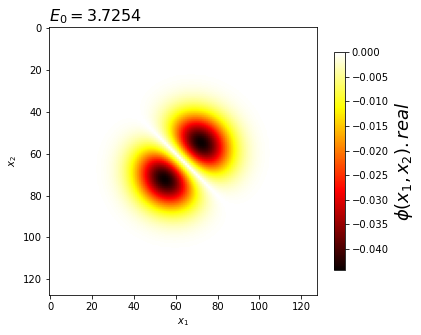

In [29]:
schro_harmonic_coulomb.plot_wavefunction(0)

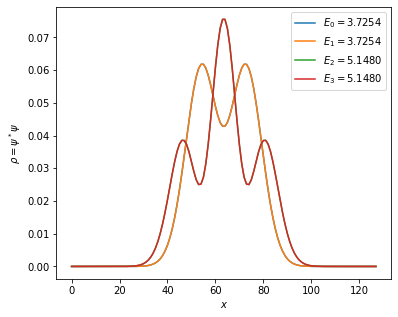

In [30]:
schro_harmonic_coulomb.plot_density(0, 1, 2, 3)

### 基矢变换

我们选择方势井波函数的本征态作为新基矢，对待求解波函数进行展开：

$$\phi_{n,m}=\frac{2}{a}\sin{\frac{n\pi x_{1}}{a}}\sin{\frac{m\pi x_{2}}{a}}$$

$$\phi_{old} = A \phi_{new}$$

相应的，Hamiltonian矩阵转换为：
$$H_{new} = A^T H_{old} A$$

In [31]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import time

class Schrodinger2D_basis_set:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar = 1,
                 xmin = -5, xmax = 5, ninterval=128):
        self.ninterval = ninterval
        self.x1 = np.linspace(xmin, xmax, ninterval)
        self.x2 = np.linspace(xmin, xmax, ninterval)
        potential = np.zeros(ninterval**2)
        for i in range(ninterval):
            for j in range(ninterval):
                potential[i*ninterval+j] = potential_func(self.x1[i], self.x2[j])
        self.Potential = sp.diags(potential)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, n_grid):
        lap_1D = sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2 * sp.eye(n_grid)
        lap_2D = sp.kron(sp.eye(n_grid), lap_1D) + sp.eye(n_grid**2, k=-n_grid) + sp.eye(n_grid**2, k=n_grid) - 2*sp.eye(n_grid**2)
        return lap_2D / (dx**2)
    def basis_set(self, ninterval, n, m):
        phi = np.zeros(ninterval*ninterval)
        for j in range(ninterval):
            for i in range(ninterval):
                phi[j*ninterval+i] = 2/ninterval * np.sin((n+1)*np.pi*i/ninterval) * np.sin((m+1)*np.pi*j/ninterval)
        return phi
    def eig_solve(self, nmax):
        ''' X_old = A X_new '''
        time_start = time.time()
        self.transition_matrix = np.zeros([self.ninterval**2, nmax**2])
        for m in range(nmax):
            for n in range(nmax):
                self.transition_matrix[:,m*nmax + n] = self.basis_set(self.ninterval, n, m)
        Hamiltonian_new = self.transition_matrix.T@self.Hamiltonian@self.transition_matrix
        '''Hamiltonian in the new basis sets is not sparse matrix'''
        eigValue, eigVector = np.linalg.eigh(Hamiltonian_new)
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
    def plot_wavefunction(self, n):
        wave_func = np.reshape(self.transition_matrix@self.eigVector[:, n], (self.ninterval, self.ninterval))
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        p = ax.imshow(wave_func.real, cmap='hot')
        cb = fig.colorbar(p, shrink=0.8)
        cb.set_label(r"$\phi(x_1, x_2).real$", fontsize=18)
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')
        ax.set_title(r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n]), loc='left', fontsize=16)
    def plot_density(self, *args):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        for n in args:
            density = np.zeros(self.ninterval)
            density_2D = np.abs(self.transition_matrix@self.eigVector[:, n])** 2
            for i in range(self.ninterval):
                for j in range(self.ninterval):
                    density[i] += density_2D[i*self.ninterval+j]
                    density[j] += density_2D[i*self.ninterval+j]
            ax.plot(density, label=r'$E_{%s}=%.4f$'%(n, self.eigEnergy[n]))
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$\rho=\psi^*\psi$')
        ax.legend()

In [32]:
schro_bs_coulomb = Schrodinger2D_basis_set(coulomb_potential)
schro_bs_coulomb.eig_solve(8)  # 基矢数目为 8^2=64

print("Energy", np.real(schro_bs_coulomb.eigEnergy[:8]))

Times Used 2.28 S
Energy [0.52341926 0.52506333 0.84246519 0.84751194 0.96904161 0.97738005
 1.24815364 1.26023817]


将待求解波函数使用合适的基矢组展开有可能降低计算量和加快计算速度，同时所得结果的精度也是可以接受的。

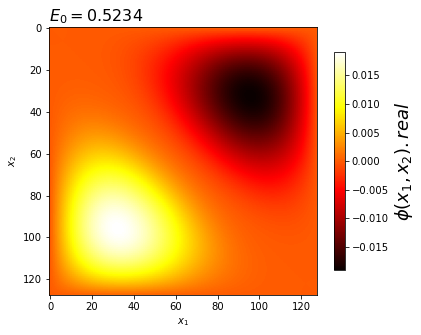

In [33]:
schro_bs_coulomb.plot_wavefunction(0)

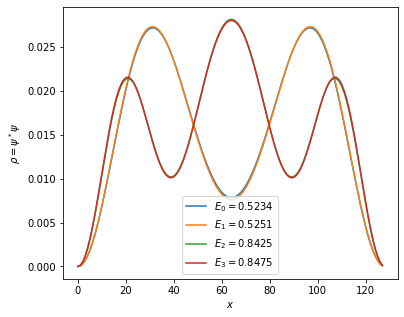

In [34]:
schro_bs_coulomb.plot_density(0, 1, 2, 3)

## 三维单粒子薛定谔方程
---

In [35]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from skimage import measure
import time

class Schrodinger3D:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar = 1,
                 xmin=-5, xmax=5, ymin=-5, ymax=5, zmin=-5, zmax=5,
                 ninterval=32):
        self.ninterval = ninterval
        self.x = np.linspace(xmin, xmax, ninterval)
        self.y = np.linspace(ymin, ymax, ninterval)
        self.z = np.linspace(zmin, zmax, ninterval)
        potential = np.zeros(ninterval**3)
        for i in range(ninterval):
            for j in range(ninterval):
                for k in range(ninterval):
                    potential[i*ninterval**2+j*ninterval+k] = potential_func(self.x[i], self.y[j], self.y[k])
        self.Potential = sp.diags(potential)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, (ymax - ymin)/ninterval, (zmax - zmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, dy, dz, n_grid):
        lap_1D = (sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2 * sp.eye(n_grid)) / dx**2
        lap_2D = sp.kron(sp.eye(n_grid), lap_1D) + (
                 sp.eye(n_grid**2, k=-n_grid) + sp.eye(n_grid**2, k=n_grid) - 2*sp.eye(n_grid**2)) / dy**2
        lap_3D = sp.kron(sp.eye(n_grid), lap_2D) + (
                 sp.eye(n_grid**3, k=-n_grid**2) + sp.eye(n_grid**3, k=n_grid**2) - 2*sp.eye(n_grid**3)) / dz**2
        return lap_3D
    def eig_solve(self):
        time_start = time.time()
        eigValue, eigVector = sp.linalg.eigsh(self.Hamiltonian, k=16, which='SA')
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
    def plot_density_2D(self, n, slice = 8):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        wave_func = np.reshape(self.eigVector[:, n], (self.ninterval, self.ninterval, self.ninterval))
        density = np.abs(wave_func) ** 2
        ax.imshow(density[:,:,slice], cmap='hot')
    def plot_density_3D(self, n, iso_val = 0.0002):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5), subplot_kw={'projection': '3d'})
        wave_func = np.reshape(self.eigVector[:, n], (self.ninterval, self.ninterval, self.ninterval))
        density = abs(wave_func) ** 2
        verts, faces, _, _ = measure.marching_cubes(density, iso_val)
        ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                        cmap='Spectral', lw=1)

### 无限深方势井
---

In [36]:
def infinite_square_potential(x, y, z):
    return 0.0

schro_infinite_square = Schrodinger3D(infinite_square_potential)
schro_infinite_square.eig_solve()

print("Lowest Energies", schro_infinite_square.eigEnergy[0:12])

Times Used 26.67 S
Lowest Energies [0.13910254 0.27778517 0.27778517 0.27778517 0.41646779 0.41646779
 0.41646779 0.50752698 0.50752698 0.50752698 0.55515042 0.6462096 ]


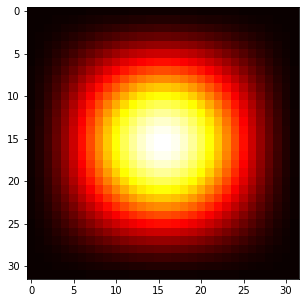

In [37]:
schro_infinite_square.plot_density_2D(0, slice=16)

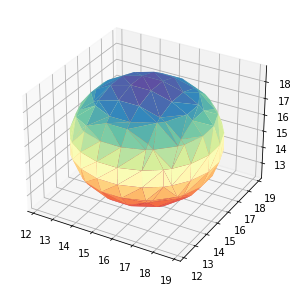

In [38]:
#%matplotlib widget
schro_infinite_square.plot_density_3D(0)

### 简谐势井
---

In [39]:
def harmonic_potential(x, y, z, k = 10):
    return 0.5 * k * (x**2 + y**2 + z**2)

schro_harmonic = Schrodinger3D(harmonic_potential)
schro_harmonic.eig_solve()

print("Lowest Energies", schro_harmonic.eigEnergy[0:12])

Times Used 14.62 S
Lowest Energies [ 4.79680394  7.92519718  7.92519718  7.92519718 10.90912756 10.90912756
 10.90912756 11.05359042 11.05359042 11.05359042 13.7357734  13.7357734 ]


能量$\frac{1}{2}n(n+1)$度简并

### 库伦势井
---

氢原子模型

In [40]:
def coulomb_potential(x, y, z, k = 4):
    return -k / (np.sqrt(x**2 + y**2 + z**2) + 1e-6)

schro_coulomb = Schrodinger3D(coulomb_potential)
schro_coulomb.eig_solve()

print("Lowest Energies", schro_coulomb.eigEnergy[0:12])

Times Used 37.03 S
Lowest Energies [-5.99529529 -1.98353143 -1.98353143 -1.98353143 -1.72240136 -0.86390827
 -0.86390827 -0.86390827 -0.84040931 -0.84040931 -0.84040931 -0.83833234]


能量$n^2$度简并

#### 氢原子的电子轨道

**1s轨道**

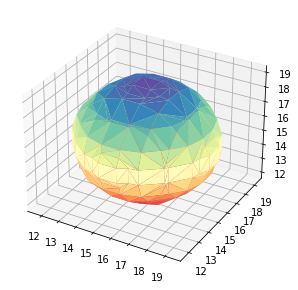

In [41]:
schro_coulomb.plot_density_3D(0)

**2p轨道**

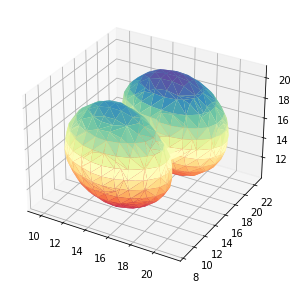

In [42]:
schro_coulomb.plot_density_3D(1)

**3d轨道**

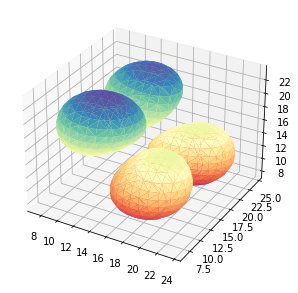

In [43]:
schro_coulomb.plot_density_3D(9)

### 基矢变换

我们选择方势井波函数的本征态作为新基矢，对待求解波函数进行展开：
$$\phi_{n,m,p}=\sqrt{\frac{8}{L_{x}L_{y}L_{z}}}\sin{\frac{n\pi x}{L_{x}}}\sin{\frac{m\pi y}{L_{y}}}\sin{\frac{p\pi z}{L_{z}}}$$

$$\phi_{old} = A \phi_{new}$$ 

相应的，Hamiltonian矩阵转换为：
$$H_{new} = A^T H_{old} A$$

In [44]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from skimage import measure
import time

class Schrodinger3D_basis_set:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ymin=-5, ymax=5, zmin=-5, zmax=5,
                 ninterval=32):
        self.ninterval = ninterval
        self.x = np.linspace(xmin, xmax, ninterval)
        self.y = np.linspace(ymin, ymax, ninterval)
        self.z = np.linspace(zmin, zmax, ninterval)
        potential = np.zeros(ninterval**3)
        for i in range(ninterval):
            for j in range(ninterval):
                for k in range(ninterval):
                    potential[i*ninterval**2+j*ninterval+k] = potential_func(self.x[i], self.y[j], self.y[k])
        self.Potential = sp.diags(potential)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, (ymax - ymin)/ninterval, (zmax - zmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, dy, dz, n_grid):
        lap_1D = (sp.eye(n_grid, k=-1) + sp.eye(n_grid, k=1) - 2 * sp.eye(n_grid)) / dx**2
        lap_2D = sp.kron(sp.eye(n_grid), lap_1D) + (
                 sp.eye(n_grid**2, k=-n_grid) + sp.eye(n_grid**2, k=n_grid) - 2*sp.eye(n_grid**2)) / dy**2
        lap_3D = sp.kron(sp.eye(n_grid), lap_2D) + (
                 sp.eye(n_grid**3, k=-n_grid**2) + sp.eye(n_grid**3, k=n_grid**2) - 2*sp.eye(n_grid**3)) / dz**2
        return lap_3D
    def basis_set(self, ninterval, N, M, P):
        phi = np.zeros(ninterval**3)
        for k in range(ninterval):
            for j in range(ninterval):
                for i in range(ninterval):
                    phi[k*ninterval**2+j*ninterval+i] = ((2/ninterval)**1.5 * np.sin((N+1)*np.pi*i/ninterval) *
                                                        np.sin((M+1)*np.pi*j/ninterval) * np.sin((P+1)*np.pi*k/ninterval))
        return phi
    def eig_solve(self, nmax):
        time_start = time.time()
        self.transition_matrix = np.zeros([self.ninterval**3, nmax**3])
        for p in range(nmax):
            for m in range(nmax):
                for n in range(nmax):
                    self.transition_matrix[:,p*nmax**2 + m*nmax + n] = self.basis_set(self.ninterval, n, m, p)
        Hamiltonian_new = self.transition_matrix.T@self.Hamiltonian@self.transition_matrix
        eigValue, eigVector = np.linalg.eigh(Hamiltonian_new)         
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
        time_end = time.time()
        print("Times Used %.2f S"%(time_end - time_start))
    def plot_density_2D(self, n, slice = 8):
        fig, ax = plt.subplots(1, 1, figsize=(6, 5))
        wave_func = np.reshape(self.transition_matrix@self.eigVector[:, n], (self.ninterval, self.ninterval, self.ninterval))
        density = abs(wave_func) ** 2
        ax.imshow(density[:,:,slice], cmap='hot')
    def plot_density_3D(self, n, iso_val = 0.0002):
        wave_func = np.reshape(self.transition_matrix@self.eigVector[:, n], (self.ninterval, self.ninterval, self.ninterval))
        density = abs(wave_func) ** 2
        verts, faces, _, _ = measure.marching_cubes(density, iso_val)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                        cmap='Spectral', lw=1)

In [45]:
schro_bs_coulomb = Schrodinger3D_basis_set(coulomb_potential)
schro_bs_coulomb.eig_solve(8)  # 基矢数目为 8^3=512

print("Lowest Energies", schro_bs_coulomb.eigEnergy[:12])

Times Used 59.73 S
Lowest Energies [-4.05974394 -1.6964414  -1.69522577 -1.69522577 -1.26880776 -0.82614351
 -0.82596279 -0.82596279 -0.80507661 -0.80507661 -0.72221641 -0.72056063]


**3d轨道**

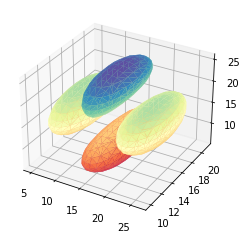

In [46]:
schro_bs_coulomb.plot_density_3D(9)

## 维度灾难
---

数值求解偏微分方程的计算量与问题的维度成指数关系。以n电子波函数为例，假设单一方向上离散点的数目为N，其哈密顿矩阵的尺寸为$N^{3n} \times N^{3n}$。因此，直接对薛定谔方程进行数值求解是没有可操作性的。

解决维度灾难的一个方法是将原始问题降维。还是以电子波函数为例，如果可以将求解多电子波函数简化为求解单电子波函数，则问题就会大大简化。使用平均场方法，我们可以将多电子的运动问题，简化为一个单电子在所有电子构成的有效平均场中的运动问题。这就是第一性模拟计算中广泛使用的Hartree-Fock方法和密度泛函理论的数学基础。